In [1]:
!pip install plotly pandas pycountry


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.3 MB 563.7 kB/s eta 0:00:12
   ---------------------------------------- 0.1/6.3 MB 563.7 kB/s eta 0:00:12
   - -------------------------------------- 0.2/6.3 MB 748.1 kB/s eta 0:00:09
   - -------------------------------------- 0.2/6.3 MB 655.9 kB/s eta 0:00:10
   - -------------------------------------- 0.3/6.3 MB 850.6 kB/s eta 0:00:08
   - -------------------------------------- 0.3/6.3 MB 842.9 kB/s eta 0:00:08
   -- ------------------------------------- 0.4/6.3 MB 958.4 kB/s eta 0:00:07
   -- -------------------------

In [4]:
import pandas as pd

In [31]:

df = pd.read_csv("pop.csv")
df

country   1800   1801   1802   1803   1804   1805   1806   1807  \
0     Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1          Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2         Albania   400k   402k   404k   405k   407k   409k   411k   413k   
3         Andorra   2650   2650   2650   2650   2650   2650   2650   2650   
4             UAE  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   
..            ...    ...    ...    ...    ...    ...    ...    ...    ...   
192         Samoa  47.3k  47.3k  47.3k  47.3k  47.3k  47.3k  47.3k  47.2k   
193         Yemen  2.59M  2.59M  2.59M  2.59M  2.59M  2.59M  2.59M  2.59M   
194  South Africa  1.45M  1.45M  1.46M  1.46M  1.47M  1.47M  1.48M  1.49M   
195        Zambia   747k   758k   770k   782k   794k   806k   818k   831k   
196      Zimbabwe  1.09M  1.09M  1.09M  1.09M  1.09M  1.09M  1.09M  1.09M   

      1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0    3.28M  ...   124M   125M   126M   126M   127M   128M   128M   129M   
1    1.57M  ...   139M   140M   142M   143M   144M   145M   147M   148M   
2     414k  ...  1.34M  1.32M   1.3M  1.29M  1.27M  1.25M  1.23M  1.22M   
3     2650  ...  52.8k  52.1k  51.5k  50.8k  50.2k  49.6k    49k  48.4k   
4    40.2k  ...  24.1M  24.3M  24.5M  24.7M    25M  25.2M  25.4M  25.7M   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
192  47.2k  ...   370k   372k   374k   375k   377k   378k   380k   381k   
193  2.59M  ...   107M   107M   107M   108M   108M   109M   109M   109M   
194  1.49M  ...  92.4M  92.6M  92.9M  93.1M  93.3M  93.5M  93.7M  93.9M   
195   843k  ...  61.1M  61.5M  61.9M  62.3M  62.7M  63.1M  63.4M  63.8M   
196  1.09M  ...  36.3M  36.4M  36.5M  36.6M  36.7M  36.8M  36.9M    37M   

      2099   2100  
0     130M   130M  
1     149M   150M  
2     1.2M  1.18M  
3    47.8k  47.2k  
4    25.9M  26.1M  
..     ...    ...  
192   382k   384k  
193   110M   110M  
194  94.1M  94.3M  
195  64.1M  64.5M  
196  37.1M  37.2M  

[197 rows x 302 columns]

In [15]:
df_long = df.melt(id_vars=["country"], var_name="year", value_name="population")


In [16]:
df_long["year"] = df_long["year"].astype(int)

In [17]:
def convert_population(val):
    if isinstance(val, str):
        val = val.replace(",", "").strip()
        if val.endswith('M'):
            return float(val[:-1]) * 1e6
        elif val.endswith('B'):
            return float(val[:-1]) * 1e9
        elif val.endswith('k'):
            return float(val[:-1]) * 1e3
        else:
            try:
                return float(val)
            except:
                return None
    return val

df_long["population"] = df_long["population"].apply(convert_population)


In [18]:
df_long = df_long.dropna(subset=["population"])

In [19]:
df_long.head()

country  year  population
0  Afghanistan  1800   3280000.0
1       Angola  1800   1570000.0
2      Albania  1800    400000.0
3      Andorra  1800      2650.0
4          UAE  1800     40200.0

In [20]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import plotly.express as px

fig = px.choropleth(
    df_long,
    locations="country",
    locationmode="country names",
    color="population",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="Viridis",
    title="World Population by Country Over Time"
)

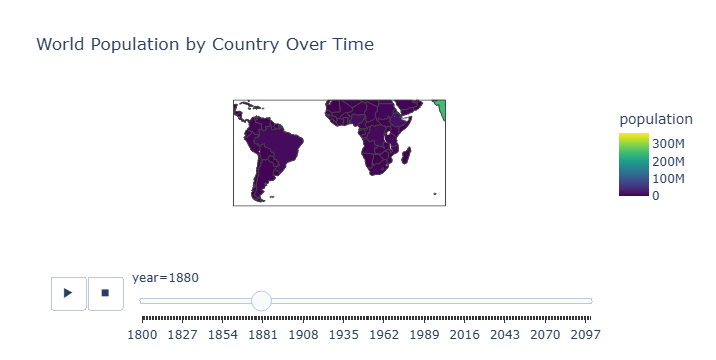

In [25]:
fig.show()